# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Hierarchical Clustering

_Hierarchical clustering_, also known as _hierarchical cluster analysis_, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

### How hierarchical clustering works

Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps: 
1. identify the two clusters that are closest together,
2. merge the two most similar clusters. 

This iterative process continues until all the clusters are merged together. This is illustrated in the diagrams below.

<p align="center">
    <img width="678" alt="image" src="https://cdn-dfnaj.nitrocdn.com/xxeFXDnBIOflfPsgwjDLywIQwPChAOzV/assets/static/optimized/rev-86e3057/wp-content/uploads/2018/03/Hierarchical-clustering-3-1.png">
</p>

The main output of Hierarchical Clustering is a dendrogram, which shows the hierarchical relationship between the clusters:

<p align="center">
    <img width="678" alt="image" src="https://cdn-dfnaj.nitrocdn.com/xxeFXDnBIOflfPsgwjDLywIQwPChAOzV/assets/static/optimized/rev-86e3057/wp-content/uploads/2018/03/Screen-Shot-2018-03-21-at-4.44.41-pm.png">
</p>

### How to read a dendrogram

The key to interpreting a dendrogram is to focus on the height at which any two objects are joined together. 
In the example above, we can see that $E$ and $F$ are most similar, as the height of the link that joins them together is the smallest. The next two most similar objects are $A$ and $B$.

In the dendrogram above, the height of the dendrogram indicates the order in which the clusters were joined. A more informative dendrogram can be created where the heights reflect the distance between the clusters as is shown below. In this case, the dendrogram shows us that the big difference between clusters is between the cluster of $A$ and $B$ versus that of $C$, $D$, $E$, and $F$.

It is important to appreciate that the dendrogram is a summary of the distance matrix, and, as occurs with most summaries, information is lost. For example, the dendrogram suggests that $C$ and $D$ are much closer to each other than is $C$ to $B$, but the original data (shown in the scatterplot), shows us that this is not true. To use some jargon, a dendrogram is only accurate when data satisfies the ultrametric tree inequality, and this is unlikely for any real-world data.

The consequence of the information loss is that the dendrograms are most accurate at the bottom, showing which items are very similar.

#### Allocating observations to clusters

Observations are allocated to clusters by drawing a horizontal line through the dendrogram. 
Observations that are joined together below the line are in clusters. In the example below, we have two clusters. One cluster combines $A$ and $B$, and a second cluster combining $C$, $D$, $E$, and $F$.

<p align="center">
    <img width="678" alt="image" src="https://cdn-dfnaj.nitrocdn.com/xxeFXDnBIOflfPsgwjDLywIQwPChAOzV/assets/static/optimized/rev-86e3057/wp-content/uploads/2018/03/Screen-Shot-2018-03-21-at-4.45.46-pm.png">
</p>

#### Dendrograms cannot tell you how many clusters you should have

A common mistake people make when reading dendrograms is to assume that the shape of the dendrogram gives a clue as to how many clusters exist. In the example above, the (incorrect) interpretation is that the dendrogram shows that there are two clusters, as the distance between the clusters (the vertical segments of the dendrogram) are highest between two and three clusters.

### Measures of distance (similarity)

Back to the example above, the distance between two clusters has been computed based on the length of the straight line drawn from one cluster to another. This is commonly referred to as the Euclidean distance. Many other distance metrics have been developed.

The choice of distance metric should be made based on theoretical concerns from the domain of study. That is, a distance metric needs to define similarity in a way that is sensible for the field of study. For example, if clustering crime sites in a city, city block distance may be appropriate. Or, better yet, the time taken to travel between each location. Where there is no theoretical justification for an alternative, the Euclidean should generally be preferred, as it is usually the appropriate measure of distance in the physical world.

### Linkage Criteria

After selecting a distance metric, it is necessary to determine from where distance is computed. For example, it can be computed between the two most similar parts of a cluster (single-linkage), the two least similar bits of a cluster (complete-linkage), the center of the clusters (mean or average-linkage), or some other criterion. Many linkage criteria have been developed.

As with distance metrics, the choice of linkage criteria should be made based on theoretical considerations from the domain of application. A key theoretical issue is what causes variation. For example, in archeology, we expect variation to occur through innovation and natural resources, so working out if two groups of artifacts are similar may make sense based on identifying the most similar members of the cluster.

Where there are no clear theoretical justifications for the choice of linkage criteria, Ward’s method is the sensible default. This method works out which observations to group based on reducing the sum of squared distances of each observation from the average observation in a cluster. This is often appropriate as this concept of distance matches the standard assumptions of how to compute differences between groups in statistics (e.g., ANOVA, MANOVA).

### Agglomerative versus divisive algorithms

Hierarchical clustering typically works by sequentially merging similar clusters, as shown above. This is known as agglomerative hierarchical clustering. In theory, it can also be done by initially grouping all the observations into one cluster, and then successively splitting these clusters. This is known as divisive hierarchical clustering. Divisive clustering is rarely done in practice.

#### Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler 

# set plot size
plt.rcParams['figure.figsize'] = (20, 13)
%matplotlib inline
%config InlineBackend.figure_format = "retina"

### Python implementation 👨‍💻

Now, let’s implement the same using sample dataset from `sklearn`.

We have seen how hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. See [here](https://en.wikipedia.org/wiki/Hierarchical_clustering) for more details.

The `AgglomerativeClustering` object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The _linkage_ criteria determines the metric used for the merge strategy:

1. Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

2. Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.

3. Average linkage minimizes the average of the distances between all observations of pairs of clusters.

4. Single linkage minimizes the distance between the closest observations of pairs of clusters.

`AgglomerativeClustering` can also scale to large number of samples when it is used jointly with a connectivity matrix, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.

In [3]:
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
X = np.array(df_iris.loc[:, iris.feature_names])

## Agglomerative Clustering
Let's now use sklearn's [`AgglomerativeClustering`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) to conduct the heirarchical clustering

In [ ]:
# Hierarchical clustering
# Ward is the default linkage algorithm, so we'll start with that
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(iris.data)

Let's also try complete and average linkages

Below code conducts hierarchical clustering with complete linkage, store the predicted labels in the variable ```complete_pred```. It also conducts hierarchical clustering with average linkage, stores the predicted labels in the variable ```avg_pred```

Note: look at the documentation of [```AgglomerativeClustering```](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) for more information about the appropriate value to pass as the ```linkage``` value

In [ ]:
# Hierarchical clustering using complete linkage
# Create an instance of AgglomerativeClustering with the appropriate parameters
complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
# Fit & predict
# Make AgglomerativeClustering fit the dataset and predict the cluster labels
complete_pred = complete.fit_predict(iris.data)

# Hierarchical clustering using average linkage
# Create an instance of AgglomerativeClustering with the appropriate parameters
avg = AgglomerativeClustering(n_clusters=3, linkage='average')
# Fit & predict
# Make AgglomerativeClustering fit the dataset and predict the cluster labels
avg_pred = avg.fit_predict(iris.data)

To determine which clustering result better matches the original labels of the samples, we can use ```adjusted_rand_score``` which is an *external cluster validation index* which results in a score between -1 and 1, where 1 means two clusterings are identical of how they grouped the samples in a dataset (regardless of what label is assigned to each cluster).

In [ ]:
from sklearn.metrics import adjusted_rand_score

ward_ar_score = adjusted_rand_score(iris.target, ward_pred)

The code cell below calculates the Adjusted Rand score of the clusters resulting from complete linkage and average linkage

In [ ]:
# Calculated the adjusted Rand score for the complete linkage clustering labels
complete_ar_score = adjusted_rand_score(iris.target, complete_pred)

# Calculated the adjusted Rand score for the average linkage clustering labels
avg_ar_score = adjusted_rand_score(iris.target, avg_pred)

Which algorithm results in the higher Adjusted Rand Score?

In [ ]:
print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.7311985567707745 
Complete:  0.64225125183629 
Average:  0.7591987071071522


## 3. The Effect of Normalization on Clustering

Can we improve on this clustering result?

Let's take another look at the dataset

In [ ]:
iris.data[:15]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2]])

Looking at this, we can see that the forth column has smaller values than the rest of the columns, and so its variance counts for less in the clustering process (since clustering is based on distance). Let us [normalize](https://en.wikipedia.org/wiki/Feature_scaling) the dataset so that each dimension lies between 0 and 1, so they have equal weight in the clustering process.

This is done by subtracting the minimum from each column then dividing the difference by the range.

sklearn provides us with a useful utility called ```preprocessing.normalize()``` that can do that for us

In [ ]:
from sklearn import preprocessing

normalized_X = preprocessing.normalize(iris.data)
normalized_X[:10]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451]])

Now all the columns are in the range between 0 and 1. Would clustering the dataset after this transformation lead to a better clustering? (one that better matches the original labels of the samples). Let's see!

In [ ]:
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(normalized_X)

complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(normalized_X)

avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pred = avg.fit_predict(normalized_X)


ward_ar_score = adjusted_rand_score(iris.target, ward_pred)
complete_ar_score = adjusted_rand_score(iris.target, complete_pred)
avg_ar_score = adjusted_rand_score(iris.target, avg_pred)

print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.8856970310281228 
Complete:  0.644447235392006 
Average:  0.5583714437541352


## 4. Dendrogram visualization with scipy

Let's visualize the highest scoring clustering result. 

To do that, we'll need to use Scipy's [```linkage```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function to perform the clusteirng again so we can obtain the linkage matrix it will later use to visualize the hierarchy

In [ ]:
# Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage

# Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values
# Pick the one that resulted in the highest Adjusted Rand Score
linkage_type = 'ward'

linkage_matrix = linkage(normalized_X, linkage_type)

Plot using scipy's [dendrogram](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function

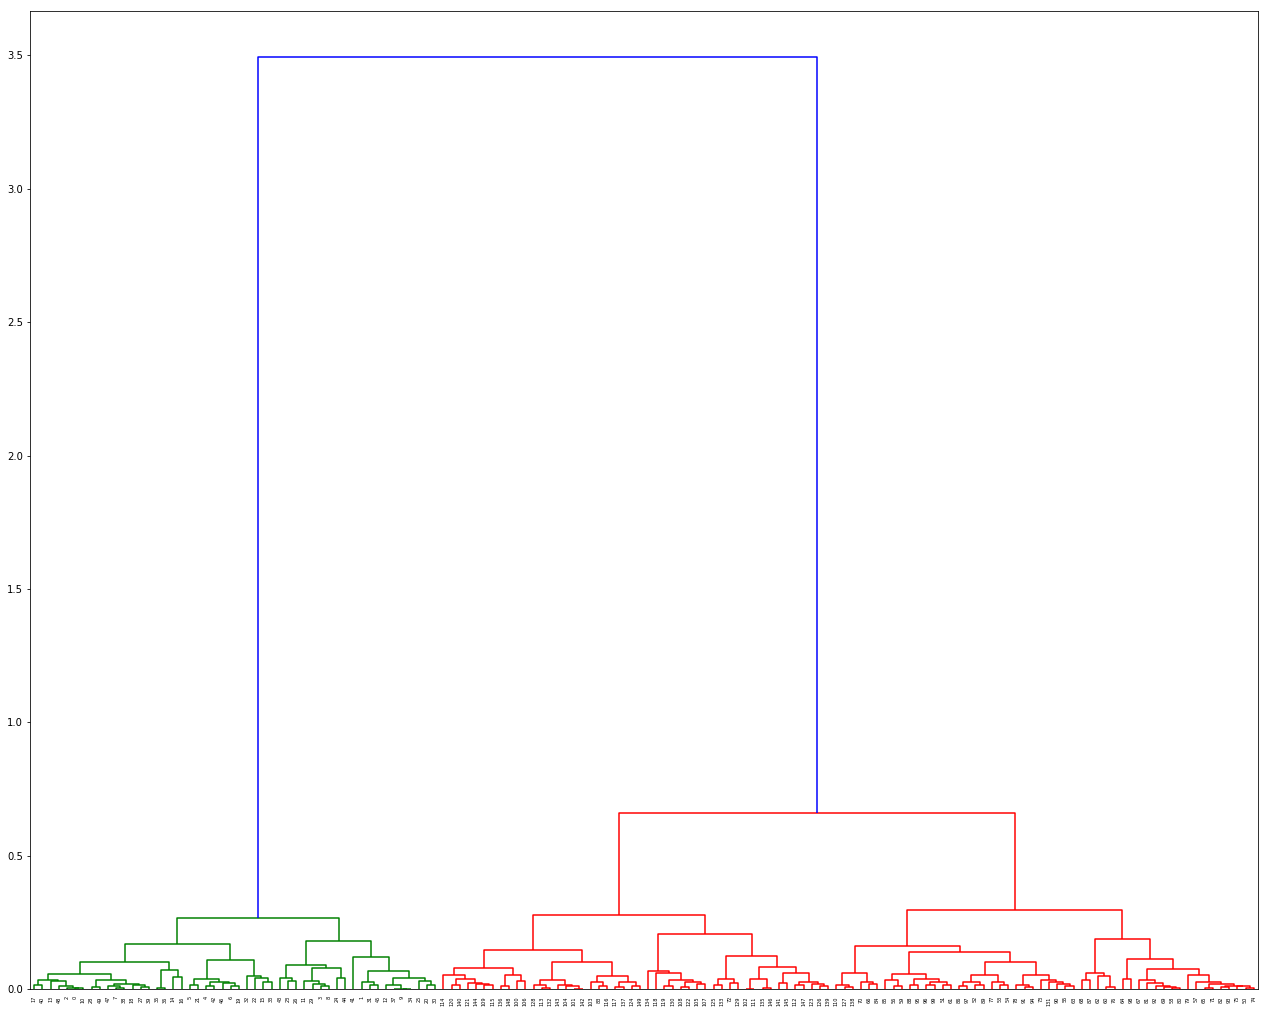

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(22,18))

# plot using 'dendrogram()'
dendrogram(linkage_matrix)

plt.show()

## 5. Visualization with Seaborn's ```clustermap``` 

The [seaborn](http://seaborn.pydata.org/index.html) plotting library for python can plot a [clustermap](http://seaborn.pydata.org/generated/seaborn.clustermap.html), which is a detailed dendrogram which also visualizes the dataset in more detail. It conducts the clustering as well, so we only need to pass it the dataset and the linkage type we want, and it will use scipy internally to conduct the clustering

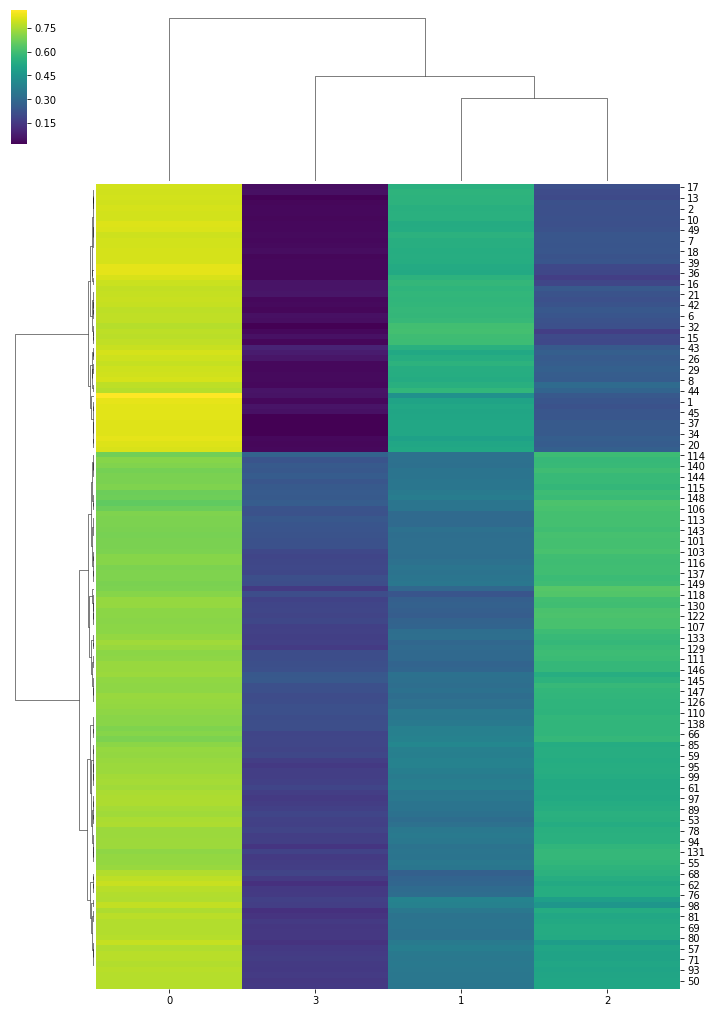

In [ ]:
import seaborn as sns

sns.clustermap(normalized_X, figsize=(12,18), method=linkage_type, cmap='viridis')

# Expand figsize to a value like (18, 50) if you want the sample labels to be readable
# Draw back is that you'll need more scrolling to observe the dendrogram

plt.show()

Looking at the colors of the dimensions we can observe how they differ between the three type of flowers (we can notice how one is vastly different from the two others (in the top third of the image))